**KELOMPOK TEH PUCUK(DATASET BANK):**
1. TIARA VALENTINA (23083010091)
2. SEFILAH NAURA SABELA (23083010105)

**melakukan pengujian metode klasifikasi (Random Forest) dengan pengoptimalan hyperparameter dan evaluasi menggunakan dataset bank**

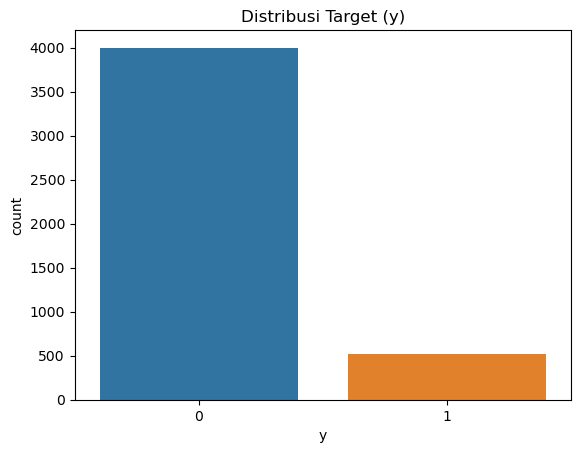

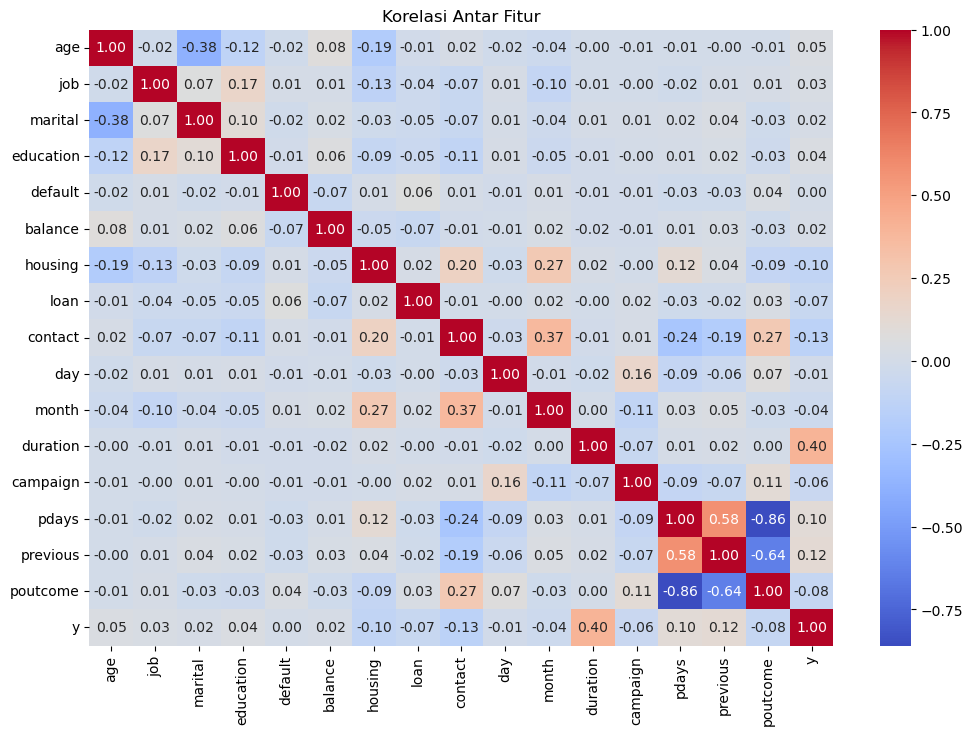

Laporan Klasifikasi Model Awal:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.62      0.31      0.41        98

    accuracy                           0.90       905
   macro avg       0.77      0.64      0.68       905
weighted avg       0.89      0.90      0.89       905

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Laporan Klasifikasi Model Terbaik:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.62      0.30      0.40        98

    accuracy                           0.90       905
   macro avg       0.77      0.64      0.67       905
weighted avg       0.89      0.90      0.89       905

Akurasi Model Terbaik: 90.39%


In [1]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Memuat dan Mengolah Data
data = pd.read_csv('/Users/tiaravalentina/Downloads/bank (1).csv', sep=';')

# Encoding data kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['y'])
y = data['y']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Statistik Deskriptif dan Visualisasi
# Distribusi target
sns.countplot(data=data, x='y')
plt.title('Distribusi Target (y)')
plt.show()

# Heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

# 3. Melatih Model Klasifikasi (Random Forest)
# Model awal tanpa tuning
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi awal
y_pred_initial = rf_model.predict(X_test)
print("Laporan Klasifikasi Model Awal:\n")
print(classification_report(y_test, y_pred_initial))

# 4. Hyperparameter Tuning
# Mencari kombinasi parameter terbaik
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Model terbaik setelah tuning
best_model = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
y_pred_best = best_model.predict(X_test)
print("Laporan Klasifikasi Model Terbaik:\n")
print(classification_report(y_test, y_pred_best))

# Menampilkan akurasi model terbaik
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model Terbaik: {accuracy * 100:.2f}%")



1. Hasil Evaluasi Model Awal
Accuracy: 90%
Model dapat memprediksi dengan benar sekitar 90% dari total data pengujian.
Precision untuk Kelas 0 (Tidak Berlangganan): 92%
Dari semua prediksi "tidak berlangganan", 92% prediksinya benar.
Precision untuk Kelas 1 (Berlangganan): 62%
Dari semua prediksi "berlangganan", hanya 62% prediksi yang benar.
Recall untuk Kelas 1 (Berlangganan): 31%
Model hanya dapat menangkap 31% dari data aktual pelanggan yang benar.
F1-Score untuk Kelas 1: 41%
Kombinasi precision dan recall untuk kelas pelanggan cukup rendah.

2. Hasil Evaluasi Model Terbaik (Setelah Hyperparameter Tuning)
Accuracy: 90.39%
Akurasi sedikit meningkat setelah tuning, meskipun perubahannya tidak signifikan.
Precision dan Recall untuk Kelas 0 (Tidak Berlangganan):
Tetap sangat baik dengan precision 92% dan recall 98%, menunjukkan model sangat akurat untuk memprediksi non-pelanggan.
Precision dan Recall untuk Kelas 1 (Berlangganan):
Precision tetap 62%, dan recall turun sedikit menjadi 30%. Ini menunjukkan bahwa meskipun tuning dilakukan, model tetap kesulitan mendeteksi pelanggan secara efektif.

Kesimpulan Akhir
Akurasi tinggi (90%) menunjukkan bahwa model cukup andal dalam memprediksi kelas mayoritas.
Namun, performanya kurang baik pada kelas minoritas (kelas pelanggan). Recall dan F1-score rendah untuk kelas 1 menunjukkan perlunya penanganan ketidakseimbangan kelas.

